In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop

In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
from keras import backend as K

if K.image_data_format() == 'channels_first':
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 1, 28, 28)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 28, 28, 1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [6]:
import keras
train_labels = keras.utils.to_categorical(mnist_train_labels)
test_labels = keras.utils.to_categorical(mnist_test_labels)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


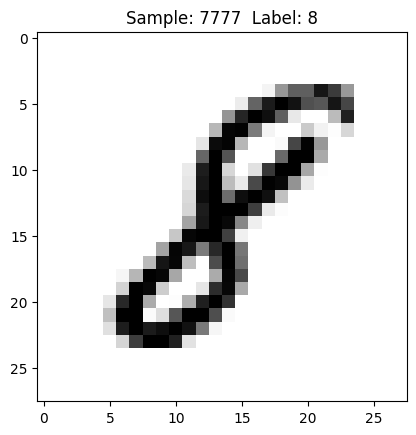

In [7]:
import matplotlib.pyplot as plt

def sample(num):
    print(train_labels[num])
    label = train_labels[num].argmax(axis=0)
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
sample(7777)

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
history = model.fit(train_images, train_labels,
                    batch_size=32,
                    epochs=3,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Epoch 1/3
1875/1875 - 7s - loss: 0.0242 - accuracy: 0.9921 - val_loss: 0.0316 - val_accuracy: 0.9913 - 7s/epoch - 4ms/step
Epoch 2/3
1875/1875 - 7s - loss: 0.0235 - accuracy: 0.9925 - val_loss: 0.0250 - val_accuracy: 0.9933 - 7s/epoch - 4ms/step
Epoch 3/3
1875/1875 - 7s - loss: 0.0190 - accuracy: 0.9939 - val_loss: 0.0316 - val_accuracy: 0.9921 - 7s/epoch - 4ms/step


In [15]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03163113445043564
Test accuracy: 0.9921000003814697
